In [1]:
#https://www.geeksforgeeks.org/online-payment-fraud-detection-using-machine-learning-in-python/?ref=lbp
#https://www.kaggle.com/datasets/jainilcoder/online-payment-fraud-detection

Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Importing Datasets

In [3]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [4]:
df = pd.read_csv('onlinefraud.csv')

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1146015 entries, 0 to 1146014
Data columns (total 11 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1146015 non-null  int64  
 1   type            1146015 non-null  object 
 2   amount          1146015 non-null  float64
 3   nameOrig        1146015 non-null  object 
 4   oldbalanceOrg   1146014 non-null  float64
 5   newbalanceOrig  1146014 non-null  float64
 6   nameDest        1146014 non-null  object 
 7   oldbalanceDest  1146014 non-null  float64
 8   newbalanceDest  1146014 non-null  float64
 9   isFraud         1146014 non-null  float64
 10  isFlaggedFraud  1146014 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 96.2+ MB


In [5]:
data = pd.read_csv('onlinefraud.csv')

In [6]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


In [7]:
data.shape

(1172840, 11)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1172840 entries, 0 to 1172839
Data columns (total 11 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1172840 non-null  int64  
 1   type            1172840 non-null  object 
 2   amount          1172840 non-null  float64
 3   nameOrig        1172840 non-null  object 
 4   oldbalanceOrg   1172840 non-null  float64
 5   newbalanceOrig  1172840 non-null  float64
 6   nameDest        1172840 non-null  object 
 7   oldbalanceDest  1172840 non-null  float64
 8   newbalanceDest  1172839 non-null  float64
 9   isFraud         1172839 non-null  float64
 10  isFlaggedFraud  1172839 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 98.4+ MB


In [9]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,1.172840e+06,1.172840e+06,1.172840e+06,1.172840e+06,1.172840e+06,1.172839e+06,1.172839e+06,1172839.0
mean,3.749914e+01,1.614156e+05,8.763736e+05,8.963816e+05,9.810557e+05,1.115128e+06,1.287474e-03,0.0
std,3.413349e+01,2.744503e+05,2.972938e+06,3.009357e+06,2.301934e+06,2.418456e+06,3.585830e-02,0.0
min,1.000000e+00,1.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
25%,1.500000e+01,1.231966e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
50%,3.300000e+01,7.667106e+04,1.580200e+04,0.000000e+00,1.257661e+05,2.179296e+05,0.000000e+00,0.0
75%,4.200000e+01,2.158724e+05,1.329751e+05,1.717893e+05,9.206626e+05,1.151181e+06,0.000000e+00,0.0
max,1.320000e+02,1.000000e+07,3.893942e+07,3.894623e+07,4.216916e+07,4.220740e+07,1.000000e+00,0.0


In [10]:
data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    1
isFraud           1
isFlaggedFraud    1
dtype: int64

In [11]:
data = data.dropna()

In [12]:
data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

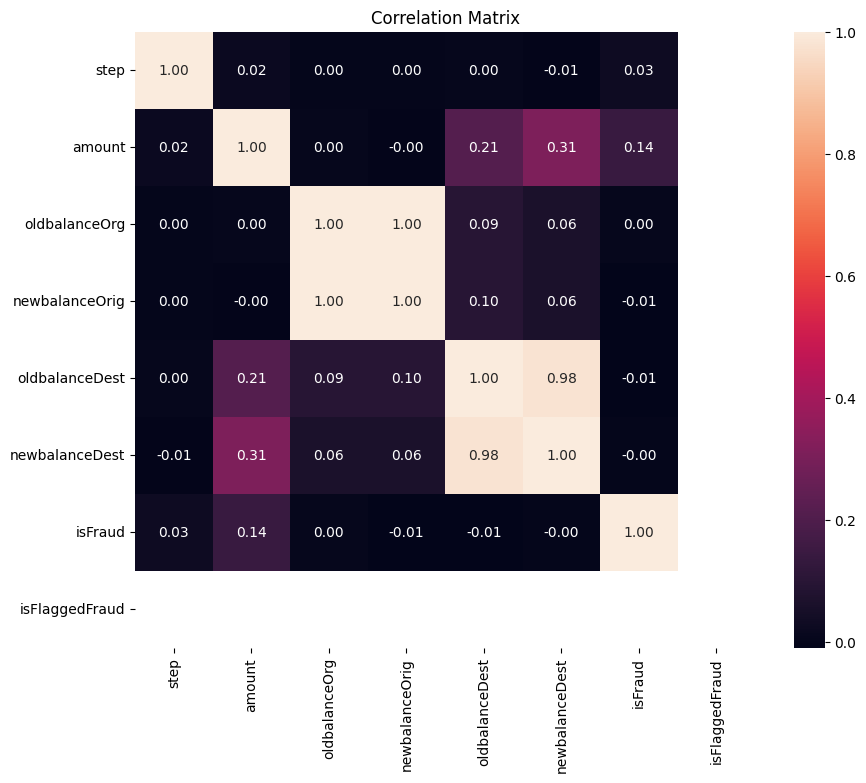

In [13]:
# Create a correlation matrix
correlation_matrix = data.corr(numeric_only=True)  # To calculate correlation only for numeric columns
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

<Axes: xlabel='type', ylabel='count'>

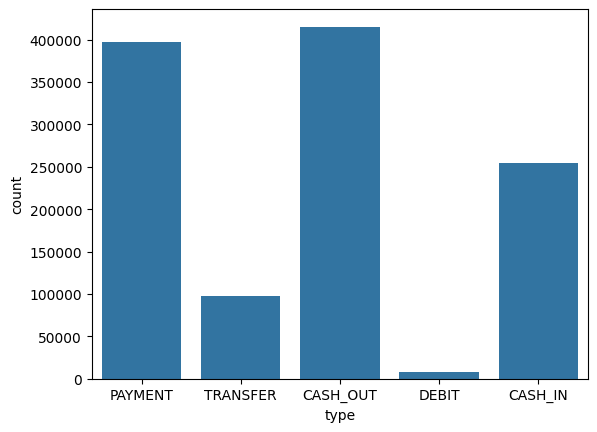

In [14]:

sns.countplot(x='type', data=data)

In [15]:
data['type'].value_counts()

type
CASH_OUT    415313
PAYMENT     397439
CASH_IN     254778
TRANSFER     97225
DEBIT         8084
Name: count, dtype: int64

In [16]:

#sns.barplot(x='type', y='amount', data=data)

In [17]:
data['step'].value_counts()

step
19     51352
18     49579
43     45060
15     44609
17     43361
       ...  
124        4
29         4
76         4
54         4
112        2
Name: count, Length: 132, dtype: int64

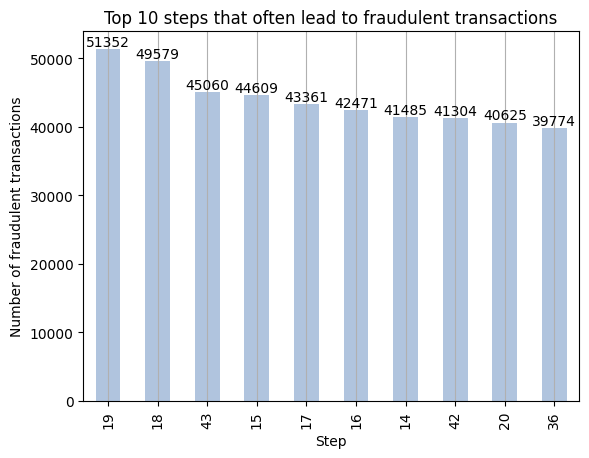

In [18]:
df1 = data[data['isFraud']==1]
df2 = data['step'].value_counts().head(10)
ax = df2.plot(kind='bar', color='lightsteelblue')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Top 10 steps that often lead to fraudulent transactions')
plt.ylabel('Number of fraudulent transactions')
plt.xlabel('Step')
plt.grid(axis='x')

del ax, df2

<Figure size 1500x600 with 0 Axes>

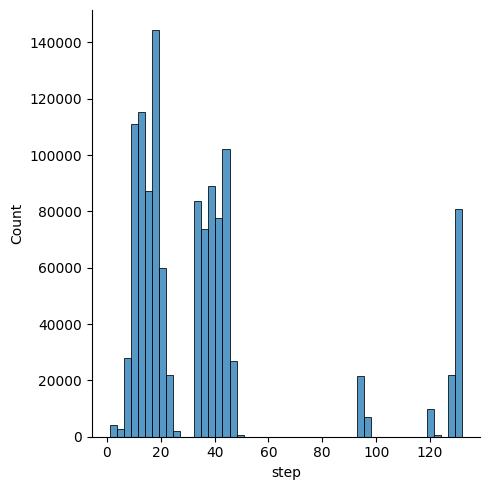

In [19]:
plt.figure(figsize=(15, 6))
sns.displot(data['step'], kind="hist", bins=50)

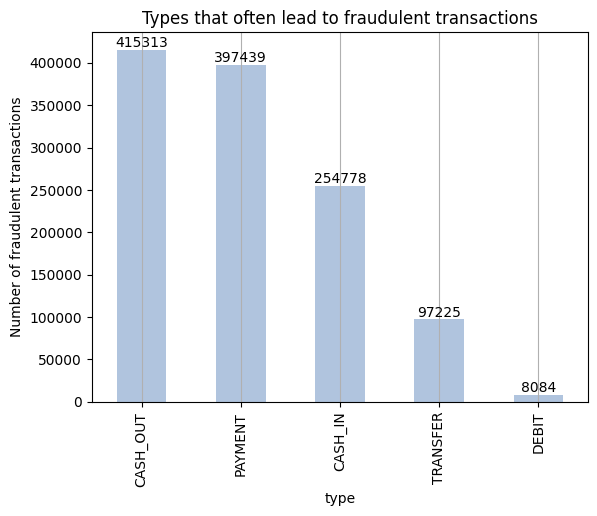

In [20]:
df1 = data[data['isFraud']==1]
df2 = data['type'].value_counts().head(10)
ax = df2.plot(kind='bar', color='lightsteelblue')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Types that often lead to fraudulent transactions')
plt.ylabel('Number of fraudulent transactions')
plt.xlabel('type')
plt.grid(axis='x')

del ax, df2

In [21]:
data['isFraud'].value_counts()

isFraud
0.0    1171329
1.0       1510
Name: count, dtype: int64

In [22]:
#can delete
# Identify non-numeric columns
#non_numeric_cols = data.select_dtypes(exclude='number').columns

# Drop the non-numeric columns
#data_numeric = data.drop(non_numeric_cols, axis=1)

# Compute the correlation matrix and plot the heatmap
#plt.figure(figsize=(12, 6))
#sns.heatmap(data_numeric.corr(), cmap='BrBG', fmt='.2f', linewidths=2, annot=True)

Data Preprocessing

This step includes the following :

Change of Type column

Dropping irrelevant columns like nameOrig, nameDest

Data Splitting

In [23]:
dic = {'PAYMENT': 1, 'TRANSFER':2, "CASH_OUT":3, "DEBIT":4, "CASH_IN":5}
data["type"] = data["type"].map(dic)

In [24]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,1,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,1,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,2,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,3,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,1,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


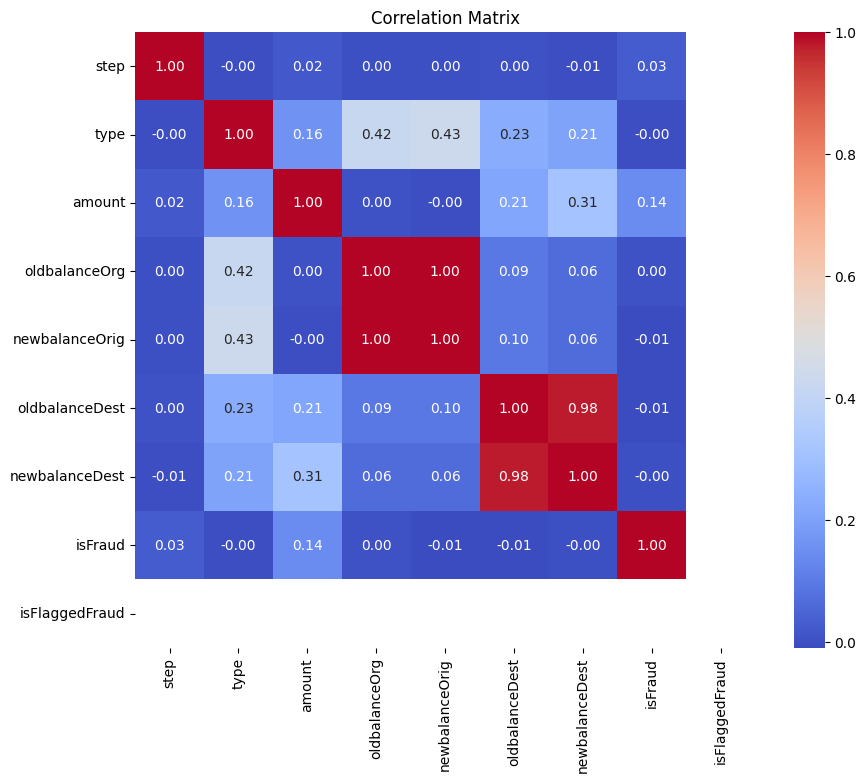

In [25]:
# Create a correlation matrix
correlation_matrix = data.corr(numeric_only=True)  # To calculate correlation only for numeric columns
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [26]:
#drop the irrelevant columns for X
#isfraud: target, 'nameOrig': object, 'nameDest': object, isFlaggedFraud: all are 0

In [27]:
X = data.drop(['isFraud', 'nameOrig', 'nameDest','isFlaggedFraud'], axis=1)
y = data['isFraud']

In [28]:
#check the shape of extracted data
X.shape, y.shape

((1172839, 7), (1172839,))

Standardization

In [29]:
#from sklearn.preprocessing import scale, StandardScaler

In [30]:
#scaler = StandardScaler()

In [31]:
#scaler.fit(X)

In [32]:
#standardized_data = scaler.transform(X)

In [33]:
#print(standardized_data)

In [34]:
#Now let’s split the data into 2 parts : Training and Testing.

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

Model Training

As the prediction is a classification problem so the models we will be using are :

LogisticRegression :  It predicts that the probability of a given data belongs to the particular category or not.

XGBClassifier : It refers to Gradient Boosted decision trees. In this algorithm, decision trees are created in sequential form and weights are assigned to all the independent variables which are then fed into the decision tree which predicts results.

SVC : SVC is used to find a hyperplane in an N-dimensional space that distinctly classifies the data points. Then it gives the output according the most nearby element.

RandomForestClassifier : Random forest classifier creates a set of decision trees from a randomly selected subset of the training set. Then, it collects the votes from different decision trees to decide the final prediction.
Let’s import the modules of the relevant models.

In [35]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score as ras
from sklearn.metrics import classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [36]:
#Once done with the importing, Let’s train the model.

In [37]:

models = [LogisticRegression(), XGBClassifier()]

for i in range(len(models)):
    models[i].fit(X_train, y_train)

In [38]:
for i in range(len(models)):
    print(f'{models[i]} : ')

    train_preds = models[i].predict_proba(X_train)[:, 1]
    print('Training Accuracy : ', ras(y_train, train_preds))

    y_preds = models[i].predict_proba(X_test)[:, 1]
    print('Validation Accuracy : ', ras(y_test, y_preds))
    print()

LogisticRegression() : 
Training Accuracy :  0.8831764282475582
Validation Accuracy :  0.8678330107642253

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...) : 
Training Accuracy :  0.9999844294104333
Validation Accuracy :  0.9986549104301959



Model Evaluation

The best-performed model is XGBClassifier. Let’s plot the Confusion Matrix.



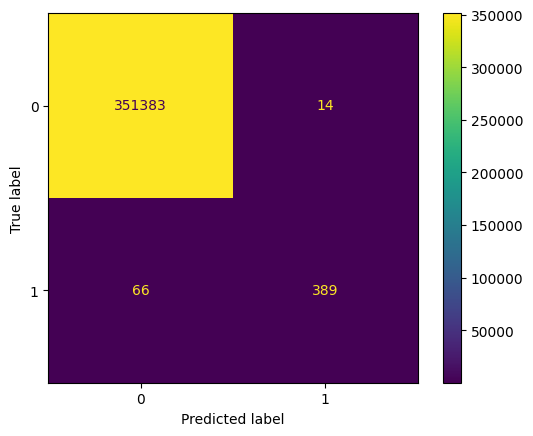

In [39]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Compute the confusion matrix
y_pred = models[1].predict(X_test)
cm = confusion_matrix(y_test, y_pred)

# Create the confusion matrix plot
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [40]:
#if cannot show whole number
#use heatmap to replace

<Axes: >

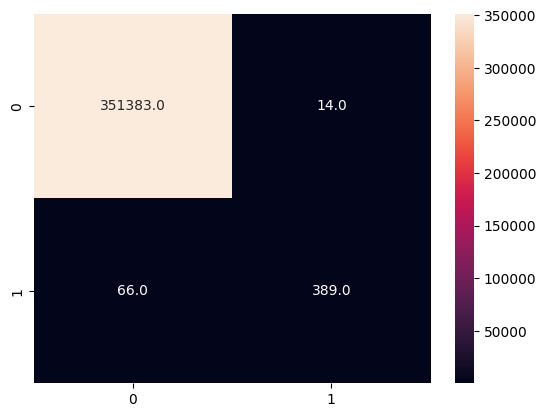

In [41]:
sns.heatmap(cm,annot=True, fmt=".1f")

In [42]:
from sklearn.metrics import classification_report, accuracy_score

# Assuming y_test and y_preds are continuous values
# Convert to binary labels (0 and 1)
y_test_binary = (y_test > 0.5).astype(int)
y_preds_binary = (y_preds > 0.5).astype(int)

print("Classification Report: ")
print(classification_report(y_test_binary, y_preds_binary))

print("")
print("Accuracy Score: ", accuracy_score(y_test_binary, y_preds_binary))

Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    351397
           1       0.97      0.85      0.91       455

    accuracy                           1.00    351852
   macro avg       0.98      0.93      0.95    351852
weighted avg       1.00      1.00      1.00    351852


Accuracy Score:  0.9997726316746814


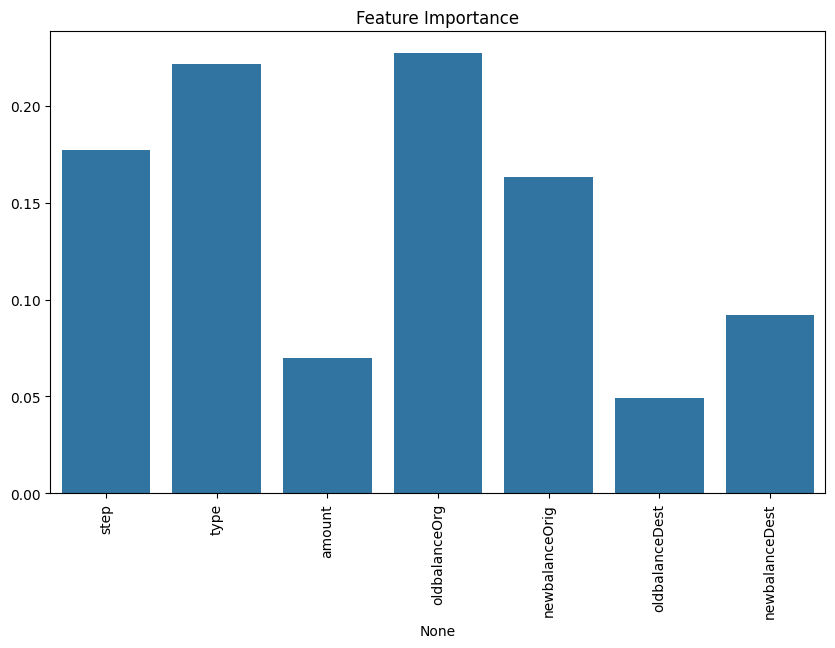

In [43]:
# Feature importance for XGBoost Classifier
model = XGBClassifier(random_state=42)
model.fit(X_train, y_train)
feature_importances = model.feature_importances_

# Plot the feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=X_train.columns, y=feature_importances)
plt.xticks(rotation=90)
plt.title("Feature Importance")
plt.show()

In [44]:
feature_importances

array([0.17730372, 0.2214778 , 0.07003733, 0.22699338, 0.16296686,
       0.04911557, 0.09210536], dtype=float32)

Prediction

Enter A new transaction with features value to predict whether it is fraud or not.

In [45]:

user_input = {
    'step': 1,
     'type':3, #'PAYMENT': 1, 'TRANSFER':2, "CASH_OUT":3, "DEBIT":4, "CASH_IN":5
    'amount': 1000.00,
    'oldbalanceOrg': 1000.00,
    'newbalanceOrig': 0.00,
    'oldbalanceDest': 0.00,
    'newbalanceDest': 0.00
}
# Create a DataFrame from user input
user_df = pd.DataFrame([user_input])

# Make predictions using the model
user_predictions = model.predict(user_df)

# Check if the user input resulted in fraud or not
if user_predictions[0] == 1:
    print("The transaction is predicted as fraud.")
else:
    print("The transaction is predicted as non-fraud.")

The transaction is predicted as fraud.
